# Anlysis of the Incel Communities Network (insert network when Adreas has created it)

In [17]:
#Import relevant libraries
import json
import networkx as nx
from netwulf import visualize, draw_netwulf
import netwulf as nw
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast
from itertools import product
from collections import Counter
import networkx as nx
import random
from wordcloud import WordCloud
from tqdm import tqdm
from joblib import Parallel, delayed
import warnings  
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import networkx as nx

# --- Load all four graphs
G_All       = nx.read_gml("data/graphs/reddit-all-posts.anon.gml", label=None)
G_Braincels = nx.read_gml("data/graphs/reddit-braincels-posts.anon.gml", label=None)
G_Incel     = nx.read_gml("data/graphs/reddit-incel-posts.anon.gml", label=None)
G_IncelExit = nx.read_gml("data/graphs/reddit-IncelExit-posts.anon.gml", label=None)

In [46]:

def print_graph_info(name, G):
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    density = nx.density(G)
    if G.is_directed():
        connected = nx.is_weakly_connected(G)
    else:
        connected = nx.is_connected(G)
    print("\n")    
    print("#" * 40)
    print(f"{name}")
    print("-" * 40)
    print(f"Nodes: {num_nodes}")
    print(f"Edges: {num_edges}")
    print(f"Density: {density:.6f}")
    print(f"Directed: {G.is_directed()}")
    print(f"Connected: {connected}")
    print("#" * 40)


print_graph_info("Reddit - All Posts", G_All)
print_graph_info("Reddit - Braincels", G_Braincels)
print_graph_info("Reddit - Incel", G_Incel)
print_graph_info("Reddit - IncelExit", G_IncelExit)




########################################
Reddit - All Posts
----------------------------------------
Nodes: 101214
Edges: 1282735
Density: 0.000125
Directed: True
Connected: False
########################################


########################################
Reddit - Braincels
----------------------------------------
Nodes: 75134
Edges: 1158035
Density: 0.000205
Directed: True
Connected: False
########################################


########################################
Reddit - Incel
----------------------------------------
Nodes: 23903
Edges: 110983
Density: 0.000194
Directed: True
Connected: False
########################################


########################################
Reddit - IncelExit
----------------------------------------
Nodes: 4003
Edges: 13931
Density: 0.000870
Directed: True
Connected: False
########################################


Text(0.5, 1.0, 'Network of All Reddit Posts')

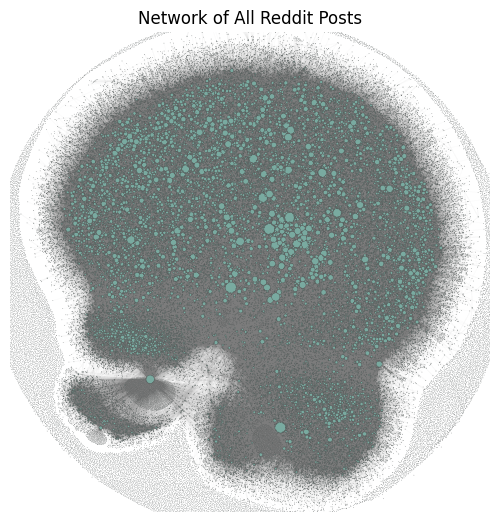

In [54]:
network, config = nw.visualize(G_All, plot_in_cell_below=False)
fig, ax = nw.draw_netwulf(network)
ax.set_title('Network of All Reddit Posts')

Text(0.5, 1.0, 'Braincels Network')

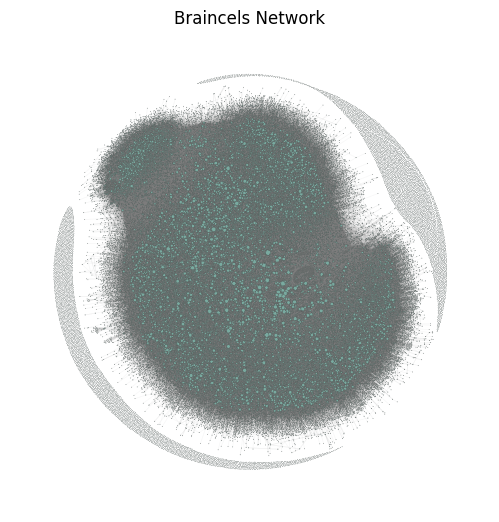

In [49]:
network, config = nw.visualize(G_Braincels, plot_in_cell_below=False)
fig, ax = nw.draw_netwulf(network)
ax.set_title('Braincels Network')

Text(0.5, 1.0, 'Incel Network')

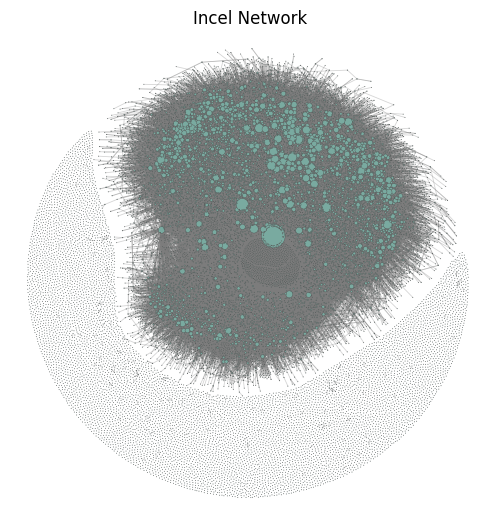

In [52]:
from netwulf import visualize

# Suppose this is your last visualization
network, config = visualize(G_Incel, plot_in_cell_below=False)

fig, ax = nw.draw_netwulf(network)
ax.set_title('Incel Network')

Text(0.5, 1.0, 'IncelExit Network')

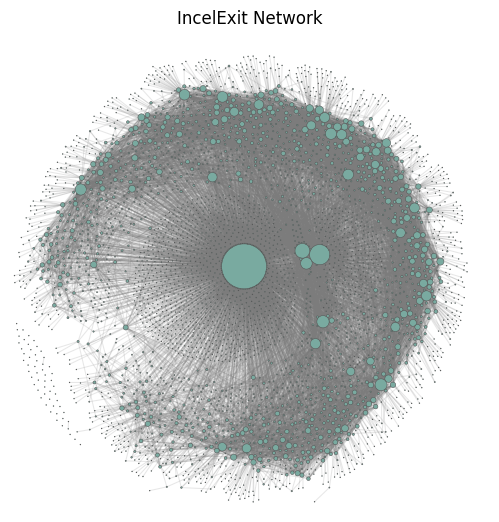

In [51]:
from netwulf import visualize

# Suppose this is your last visualization
network, config = visualize(G_IncelExit, plot_in_cell_below=False)

fig, ax = nw.draw_netwulf(network)
ax.set_title('IncelExit Network')

# Baseline network - a random network to compare with

In [60]:
# --- Function to calculate and print average degree using p
def print_average_degree(name, G):
    N = G.number_of_nodes()
    L = G.number_of_edges()
    
    if G.is_directed():
        p = L / (N * (N - 1))
    else:
        p = (2 * L) / (N * (N - 1))
    
    k = p * (N - 1)

    print("\n")
    print("#" * 40)
    print(f"{name} — Average Degree Analysis")
    print("-" * 40)
    print(f"Link probability (p): {p:.6f}")
    print(f"Average degree (k): {k:.2f}")
    print("#" * 40)

print_average_degree("Reddit - All Posts", G_All)
print_average_degree("Reddit - Braincels", G_Braincels)
print_average_degree("Reddit - Incel", G_Incel)
print_average_degree("Reddit - IncelExit", G_IncelExit)



########################################
Reddit - All Posts — Average Degree Analysis
----------------------------------------
Link probability (p): 0.000125
Average degree (k): 12.67
########################################


########################################
Reddit - Braincels — Average Degree Analysis
----------------------------------------
Link probability (p): 0.000205
Average degree (k): 15.41
########################################


########################################
Reddit - Incel — Average Degree Analysis
----------------------------------------
Link probability (p): 0.000194
Average degree (k): 4.64
########################################


########################################
Reddit - IncelExit — Average Degree Analysis
----------------------------------------
Link probability (p): 0.000870
Average degree (k): 3.48
########################################


We move on with the analysis only using Braincells network because the full network is too big, and the braincell one is the most similar to the overall degree distribution and link probability.

In [ ]:
#the Braincels network
N = G_Braincels.number_of_nodes() 
L = G_Braincels.number_of_edges() 

p = L / (N * (N - 1))

#calculate the average degree using p
k = p*(N-1)
print(f'The probability of a link between two nodes is: {p}')
print(f'Average degree of the incelExit-network: {k}')

The probability of a link between two nodes is: 0.00020514193364253632
Average degree of the incelExit-network: 15.412928900364681


In [63]:
#function to calculate generate random network:
def generate_random_network(node_count, probability):
    random_network = nx.Graph()
    nodes = range(node_count)
    random_network.add_nodes_from(nodes)

    for i in tqdm(nodes, desc="Generating network", unit="node"):
        for j in nodes:
            if i < j:
                if np.random.uniform(0, 1) < probability:
                    random_network.add_edge(i, j)

    return random_network

# Generate random network
random_network = generate_random_network(N, p)

Generating network: 100%|██████████| 75134/75134 [1:22:36<00:00, 15.16node/s]  


In [64]:
# Print some information about the generated random network
print(f'The number of nodes in the random network is {random_network.number_of_nodes()} and the amount of edges are {random_network.number_of_edges()}')
print(f'The denisty of random network is {nx.density(random_network)}')
print(f'Is the graph fully connected: {nx.is_connected(random_network)}')
print(f'The average degree of the random network is {np.mean([degree for node, degree in random_network.degree()])}')

The number of nodes in the random network is 75134 and the amount of edges are 579442
The denisty of random network is 0.00020529233108446384
Is the graph fully connected: True
The average degree of the random network is 15.42422871136902


Text(0.5, 1.0, 'Random network')

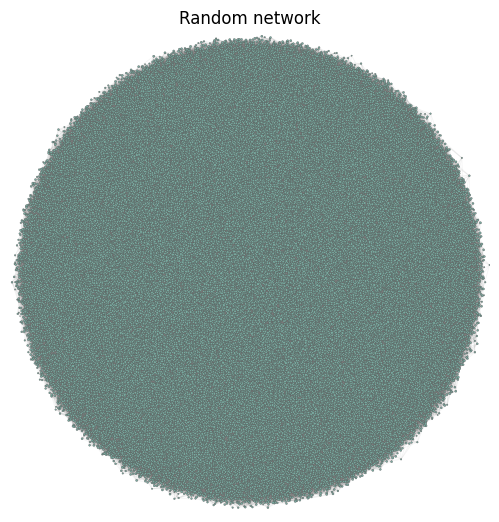

In [65]:
network, config = nw.visualize(random_network, plot_in_cell_below=False)
fig, ax = nw.draw_netwulf(network)
ax.set_title('Random network')

# Degree distribution

In [73]:
# Obtain the degrees of all nodes in the random network and CSS-network
Normal_degrees = [degree for node, degree in random_network.degree()]
Braincels_degrees = [degree for node, degree in G_Braincels.degree()]  

In [74]:
avg_in_degree  = sum(dict(G_Braincels.in_degree()).values())  / G_Braincels.number_of_nodes()
avg_out_degree = sum(dict(G_Braincels.out_degree()).values()) / G_Braincels.number_of_nodes()
print(f'Average in-degree: {avg_in_degree}, Average out-degree: {avg_out_degree}')

Average in-degree: 15.412928900364681, Average out-degree: 15.412928900364681


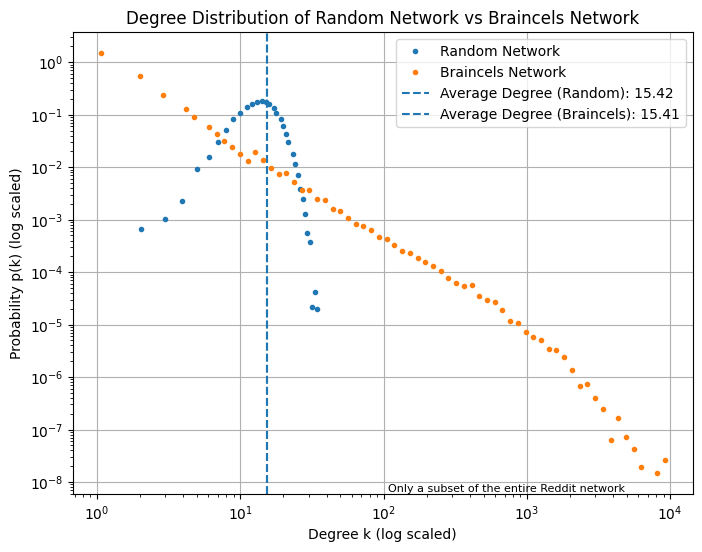

In [75]:
# Convert to arrays
Normal_degrees    = np.asarray(Normal_degrees)
Braincels_degrees = np.asarray(Braincels_degrees)

# Keep only positive degrees for log-binning
norm_pos  = Normal_degrees[Normal_degrees > 0]
brain_pos = Braincels_degrees[Braincels_degrees > 0]

if norm_pos.size == 0 or brain_pos.size == 0:
    raise ValueError("No positive-degree nodes found in one of the networks; cannot use log-scale on k=0.")

# Bins on [min_positive, max]
bins_norm  = np.logspace(np.log10(norm_pos.min()),  np.log10(norm_pos.max()),  75)
bins_brain = np.logspace(np.log10(brain_pos.min()), np.log10(brain_pos.max()), 75)

# Histograms (density=True → p(k))
hist_normal, edges_normal = np.histogram(norm_pos,  bins=bins_norm,  density=True)
hist_brain,  edges_brain  = np.histogram(brain_pos, bins=bins_brain, density=True)

# Bin centers
x_norm  = 0.5*(edges_normal[1:] + edges_normal[:-1])
x_brain = 0.5*(edges_brain[1:]  + edges_brain[:-1])

# Filter zero-density bins (log y cannot show zeros)
nz_norm  = hist_normal > 0
nz_brain = hist_brain  > 0
x_norm,  y_norm  = x_norm[nz_norm],   hist_normal[nz_norm]
x_brain, y_brain = x_brain[nz_brain], hist_brain[nz_brain]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_norm,  y_norm,  marker='.', linestyle='none', label='Random Network')
ax.plot(x_brain, y_brain, marker='.', linestyle='none', label='Braincels Network')

# Average degrees (use the original arrays)
avg_degree_random = Normal_degrees.mean()
avg_degree_brain  = Braincels_degrees.mean()/2  # Undirected graph: divide by 2
ax.axvline(avg_degree_random, linestyle='--', label=f'Average Degree (Random): {avg_degree_random:.2f}')
ax.axvline(avg_degree_brain,  linestyle='--', label=f'Average Degree (Braincels): {avg_degree_brain:.2f}')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Degree k (log scaled)')
ax.set_ylabel('Probability p(k) (log scaled)')
ax.set_title('Degree Distribution of Random Network vs Braincels Network')
ax.legend()
ax.grid(True)

plt.text(0.7, 0.0, "Only a subset of the entire Reddit network",
         ha='center', va='bottom', transform=ax.transAxes, fontsize=8)
plt.show()


In [35]:
# Obtain the degrees of all nodes in the random network and CSS-network
Normal_degrees = [degree for node, degree in random_network.degree()]
Braincels_degrees = [degree for node, degree in G_All.degree()]  

avg_in_degree  = sum(dict(G_All.in_degree()).values())  / G_Braincels.number_of_nodes()
avg_out_degree = sum(dict(G_All.out_degree()).values()) / G_Braincels.number_of_nodes()
print(f'Average in-degree: {avg_in_degree}, Average out-degree: {avg_out_degree}')

# Convert to arrays
Normal_degrees    = np.asarray(Normal_degrees)
Braincels_degrees = np.asarray(Braincels_degrees)

# Keep only positive degrees for log-binning
norm_pos  = Normal_degrees[Normal_degrees > 0]
brain_pos = Braincels_degrees[Braincels_degrees > 0]

if norm_pos.size == 0 or brain_pos.size == 0:
    raise ValueError("No positive-degree nodes found in one of the networks; cannot use log-scale on k=0.")

# Bins on [min_positive, max]
bins_norm  = np.logspace(np.log10(norm_pos.min()),  np.log10(norm_pos.max()),  75)
bins_brain = np.logspace(np.log10(brain_pos.min()), np.log10(brain_pos.max()), 75)

# Histograms (density=True → p(k))
hist_normal, edges_normal = np.histogram(norm_pos,  bins=bins_norm,  density=True)
hist_brain,  edges_brain  = np.histogram(brain_pos, bins=bins_brain, density=True)

# Bin centers
x_norm  = 0.5*(edges_normal[1:] + edges_normal[:-1])
x_brain = 0.5*(edges_brain[1:]  + edges_brain[:-1])

# Filter zero-density bins (log y cannot show zeros)
nz_norm  = hist_normal > 0
nz_brain = hist_brain  > 0
x_norm,  y_norm  = x_norm[nz_norm],   hist_normal[nz_norm]
x_brain, y_brain = x_brain[nz_brain], hist_brain[nz_brain]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_norm,  y_norm,  marker='.', linestyle='none', label='Random Network')
ax.plot(x_brain, y_brain, marker='.', linestyle='none', label='Braincels Network')

# Average degrees (use the original arrays)
avg_degree_random = Normal_degrees.mean()
avg_degree_brain  = Braincels_degrees.mean()/2  # Undirected graph: divide by 2
ax.axvline(avg_degree_random, linestyle='--', label=f'Average Degree (Random): {avg_degree_random:.2f}')
ax.axvline(avg_degree_brain,  linestyle='--', label=f'Average Degree (Braincels): {avg_degree_brain:.2f}')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Degree k (log scaled)')
ax.set_ylabel('Probability p(k) (log scaled)')
ax.set_title('Degree Distribution of Random Network vs Braincels Network')
ax.legend()
ax.grid(True)

plt.text(0.7, 0.0, "Only a subset of the entire Reddit network",
         ha='center', va='bottom', transform=ax.transAxes, fontsize=8)
plt.show()


NameError: name 'random_network' is not defined

**Average degree as a measure:** 

> Adequacy: In networks where most nodes have similar degrees, the average degree can provide a meaningful summary of the network's connectivity.

> Limitations: However Power laws/pareto/heavy tailed distributions (which most real world social networks follow) can deviate from the Law of Large Numbers because the expected population mean may not be finite or the convergence of the sample mean can be slow because og high variance due to the extreme tail-values. Therefore the sample estimates, like the average used in this analysis, can be an unreliable estimator for the population mean in such distributions as it can be hard to capture underlying structures like hubs. This is also seen as the average degree of the two networks are almost identical even though they do not follow the same distribution.


**Difference in distribution shape and properties**

> The degree distribution of a network, P(k), tells us the probability that a randomly chosen node will have degree k [2]. The degree distribution of the random network follows a symmetric distribution that resembles a Poisson the larger N gets. From the plot we see that the random network model predicts a larger number of nodes around ‹k› than seen in the CSS network [1]. In contrast, we see that the CSS network approximates a straight line in log-log-scale which means the degree distribution is a power law the slope of this line being the degree exponent. This implies a heterogeneous connectivity pattern meaning that some nodes act as major hubs while the majority have lower degrees, and the distribution has the property of being scale-free. 

# Communities

In [14]:
communities = nx.community.louvain_communities(G_All, seed=42)
# Print the resulting communities
print("Louvain Community Partition:")
print(f"Found {len(communities)} communities.")
print(f"Largest community size: {len(max(communities, key=len))}")
print(f"Smallest community size: {len(min(communities, key=len))}")


Louvain Community Partition:
Found 16052 communities.
Largest community size: 21321
Smallest community size: 1


In [16]:
G_All_communities = G_All.copy()
# Assign community as a node attribute
for i, community in enumerate(communities):
    for node in community:
        G_All_communities.nodes[node]['community'] = i



The top-5 communities and their assigned colors: {0: 'cyan', 1: 'blue', 2: 'forestgreen', 3: 'magenta', 4: 'darkorange'}

Number of nodes per community: {0: 21321, 1: 19980, 2: 19085, 3: 14617, 4: 5651}

Total nodes in the top-5 subgraph: 80654


Text(0.5, 1.0, 'Top 5 Louvain communities (netwulf)')

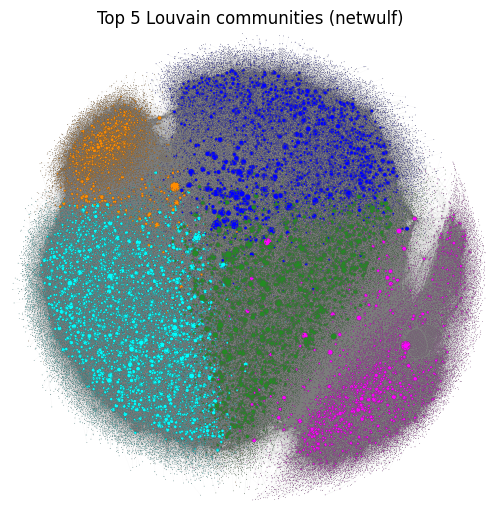

In [19]:
# --- 1) Subgraph with the 5 largest communities
sorted_comms = sorted(communities, key=len, reverse=True)[:5]
nodes = set().union(*sorted_comms)
subgraph = G_All_communities.subgraph(nodes).copy()  # copy so we can set attributes

# For robustness, (re)assign a compact community index 0..4 to every node in the subgraph
node2comm = {}
for i, comm in enumerate(sorted_comms):
    for n in comm:
        node2comm[n] = i
nx.set_node_attributes(subgraph, node2comm, name='community')

# --- 2) Colors per community (CSS/matplotlib-friendly names)
colors = ['cyan', 'blue', 'forestgreen', 'magenta', 'darkorange', 'darkviolet']  # 6 in case you up k
n_colors = len(colors)
comm_colors = {i: colors[i % n_colors] for i in range(len(sorted_comms))}

# Attach the color to each node for netwulf
for n, c in node2comm.items():
    subgraph.nodes[n]['color'] = comm_colors[c]
    # (optional aesthetics)
    # subgraph.nodes[n]['size'] = 4 + 1.5 * subgraph.degree[n]

# --- 3) Small summary
community_length = {i: len(comm) for i, comm in enumerate(sorted_comms)}
print(f"The top-5 communities and their assigned colors: { {i: comm_colors[i] for i in range(len(sorted_comms))} }\n")
print(f"Number of nodes per community: {community_length}\n")
print(f"Total nodes in the top-5 subgraph: {subgraph.number_of_nodes()}")

# --- 4) Plot with netwulf
title = "Top 5 Louvain communities (netwulf)"
network, config = visualize(subgraph)       # interactively adjust if you want
fig, ax = draw_netwulf(network, config)     # static render of the current network/config
ax.set_title(title)


In [ ]:
#nx.write_gml(G_All_communities, "data/graphs/reddit-all-posts-with-communities.gml")


In [21]:
# Look at the first few nodes with attributes
nodes = list(G_All_communities.nodes(data=True))[:5]
print("\nSample nodes (with attributes):")
for node, attrs in nodes:
    print(node, attrs)

# Look at the first few edges with attributes
edges = list(G_All_communities.edges(data=True))[:5]
print("\nSample edges (with attributes):")
for u, v, attrs in edges:
    print((u, v), attrs)


Sample nodes (with attributes):
0 {'label': '', 'posts': ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '

### Moving on with a top 5 subgraph:

In [39]:
G_Top5_communities = subgraph.copy()

# Centrality

**Degree centrality**

Degreee centrality simply tells how many edges each node in the network has. The assumption is that more central nodes work as hubs in the network and thus have a high degree [4]

In [40]:
# Compute degree centrality
degree_centrality = nx.degree_centrality(G_Top5_communities)

# Sort by centrality descending
sorted_degree = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)

# Take top 15 nodes
top15_degree = sorted_degree[:15]

# Print top 15 authors by degree centrality
for idx, (node, degree) in enumerate(top15_degree):
    name = G_All_communities.nodes[node].get('label', 'Unknown')
    print(f"{idx+1}. {name} — degree centrality: {round(degree, 4)} - Community: {G_All_communities.nodes[node]['community']} - Number of connections: {G_Top5_communities.degree[node]} - Number of posts: {G_Top5_communities.nodes[node]['n_posts']}")


1. 925121378.565168 — degree centrality: 0.1205 - Community: 7969 - Number of connections: 9716 - Number of posts: 18132
2. 924979690.842757 — degree centrality: 0.1106 - Community: 10441 - Number of connections: 8920 - Number of posts: 48598
3. 924979745.996053 — degree centrality: 0.1059 - Community: 11441 - Number of connections: 8541 - Number of posts: 104665
4. 925779251.675878 — degree centrality: 0.0975 - Community: 7969 - Number of connections: 7861 - Number of posts: 13414
5. 925002509.041104 — degree centrality: 0.0822 - Community: 4565 - Number of connections: 6633 - Number of posts: 13321
6. 929912634.012361 — degree centrality: 0.0667 - Community: 4199 - Number of connections: 5383 - Number of posts: 9026
7. 924990518.524643 — degree centrality: 0.0648 - Community: 7969 - Number of connections: 5229 - Number of posts: 7450
8. 925218254.321411 — degree centrality: 0.0611 - Community: 7969 - Number of connections: 4924 - Number of posts: 5327
9. 931491396.579248 — degree cen

**The closeness centrality**

Next we will look at closeness centrality, which tell us how "close" each node is to the other nodes in the network, meaning more central nodes have lower scores as they do not have to travel as far along the paths to get to other nodes in the network.
We still only consider the top 15 most central nodes, in networkx the centrality score is higher for more central nodes, meaning we consider the highest values in this case

In [ ]:
centrality_of_G = nx.closeness_centrality(G_Top5_communities)
sorted_closeness = sorted(centrality_of_G.items(), key=lambda item: item[1], reverse=True)
top15_closeness = sorted_closeness[:15]
top15_closeness

In [ ]:
from tqdm import tqdm
import networkx as nx

# Compute closeness centrality manually with tqdm progress
centrality_of_G = {}

# tqdm shows progress over all nodes
for n in tqdm(G_Top5_communities.nodes(), desc="Computing closeness centrality"):
    centrality_of_G[n] = nx.closeness_centrality(G_Top5_communities, u=n)

# Sort and get top 15
sorted_closeness = sorted(centrality_of_G.items(), key=lambda item: item[1], reverse=True)
top15_closeness = sorted_closeness[:15]

# Display
for node, score in top15_closeness:
    print(f"{node}: {score:.6f}")


**Betweenness centrality**

This centrality measure tell us which nodes is most often in the shortest path between two arbitrary nodes in the network. Nodes with high betweenness centrality score are usually considered gatekeepers of information and is thus informative to examine in the context of bridging across comunities.

In [ ]:
betweenness_of_G = nx.betweenness_centrality(G_All_communities)
sorted_betweenness = sorted(betweenness_of_G.items(), key=lambda item: item[1], reverse=True)
top15_between = sorted_betweenness[:15]
top15_between

Below we print out the communities our betweenness hubs bridge across. The communities are labeled later in a NLP section which grants intuition as to what each community represent in terms of wordings.

In [ ]:
bridge_dict = dict()
for (node, val) in top15_between:
    bridge_dict[str(node)] = set()
    for (self, neighbour_node) in G.edges(node):
        bridge_dict[str(self)].add(G._node[neighbour_node]['community'])
betweenness_hubs = dict()
for node, bridges in bridge_dict.items():
    betweenness_hubs[G._node[int(node)]['name']] = bridges
betweenness_hubs